<a href="https://colab.research.google.com/github/HladkyiIvan/GA_NN/blob/master/CNN_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat discriminator
## Setup packages and environment

In [1]:
!git clone https://github.com/yu4u/mixup-generator.git
%cd mixup-generator

import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model, Model
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import keras.backend as K
import tensorflow as tf
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras import applications
import cv2

from mixup_generator import MixupGenerator
%cd ..

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

img_size = 60

%load_ext autoreload
%autoreload 2

Cloning into 'mixup-generator'...
remote: Enumerating objects: 31, done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (31/31), done.
/content/mixup-generator


Using TensorFlow backend.


/content


In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
tf.__version__

'1.15.0'

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

def gray_to_rgb(img):
    return np.repeat(img, 3, 3)

## Loading dataset and preprocessing steps (use datasets providen in the description or try your own)

In [0]:
photos = np.load(root_path + 'cat_photos.npy')
labels = np.load(root_path + 'cat_labels.npy')

y = 0.0


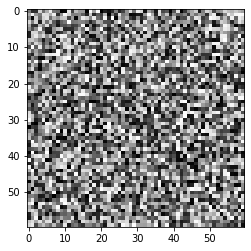

In [0]:
index = 40000
plt.imshow(photos[index])
print ("y = " + str(labels[index]))

In [0]:
train_x, test_x, train_y, test_y = train_test_split(photos, labels, test_size=0.2)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 60, 60, 1)
test_x = test_x.reshape(test_x.shape[0], 60, 60, 1)

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (53025, 60, 60, 1)
test_x's shape: (13257, 60, 60, 1)


In [0]:
cat_train_y = to_categorical(train_y)
cat_test_y = to_categorical(test_y)

## Model creation

In [0]:
def build_model():
    model = Sequential()
  
    model.add(Conv2D(16, (3, 3), input_shape=(img_size,img_size,1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Dense(2, activation='softmax'))
    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

    return model

def plot_model_history(history):
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [0]:
batch_size = 256

gen = ImageDataGenerator()
train_generator = MixupGenerator(train_x, cat_train_y, batch_size=batch_size, alpha=2, datagen=gen)()

y = [0.48687326 0.51312674]


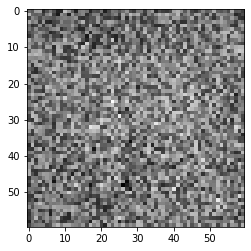

In [0]:
# Example of a generated picture
x, y = next(train_generator)
plt.imshow(x[0].reshape(60, 60))
print ("y = " + str(y[0]))

In [0]:
model = build_model()
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_x.shape[0] // batch_size,
                    validation_data=(test_x, cat_test_y),
                    epochs=5, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 58, 58, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 58, 58, 16)        64        
_________________________________________________________________
activation_106 (Activation)  (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 56, 56, 16)        64        
_________________________________________________________________
activation_107 (Activation)  (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 54, 54, 32)       

## How good is the model?

y = [0.39640465 0.60359535]
predicted y = [0.3307, 0.6693]


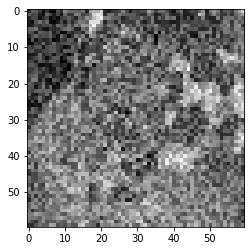

In [0]:
x, y = next(train_generator)
plt.imshow(x[0].reshape(60, 60))
pred = model.predict_proba(x[0].reshape(1, 60, 60, 1))
print ("y = " + str(y[0]))
print ("predicted y = " + str([round(p, 4) for p in pred[0]]))

In [0]:
model.save('drive/My Drive/Colab Notebooks/cat_model')

/content


## ResNet

In [0]:
base_model = applications.resnet50.ResNet50(weights= "imagenet", include_top=False, input_shape= (img_size, img_size, 3))

In [0]:
res_train_x = gray_to_rgb(train_x)
res_test_x = gray_to_rgb(test_x)

print ("train_x's shape: " + str(res_train_x.shape))
print ("test_x's shape: " + str(res_test_x.shape))

train_x's shape: (53025, 60, 60, 3)
test_x's shape: (13257, 60, 60, 3)


In [0]:
res_train_generator = MixupGenerator(res_train_x, cat_train_y, batch_size=batch_size, alpha=2, datagen=gen)()

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.65)(x)
predictions = Dense(2, activation= 'softmax')(x)
res_model = Model(inputs = base_model.input, outputs = predictions)
res_model.compile(optimizer= Adam(lr=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
207/207 [==============================] - 61s 295ms/step - loss: 0.3950 - acc: 0.9115 - val_loss: 0.0221 - val_acc: 0.9992
Epoch 2/5
207/207 [==============================] - 43s 206ms/step - loss: 0.3241 - acc: 0.9543 - val_loss: 0.0370 - val_acc: 0.9995
Epoch 3/5
207/207 [==============================] - 43s 206ms/step - loss: 0.3142 - acc: 0.9651 - val_loss: 0.0324 - val_acc: 0.9996
Epoch 4/5
207/207 [==============================] - 43s 205ms/step - loss: 0.3125 - acc: 0.9677 - val_loss: 0.0246 - val_acc: 0.9997
Epoch 5/5
207/207 [==============================] - 43s 206ms/step - loss: 0.3067 - acc: 0.9723 - val_loss: 0.0248 - val_acc: 0.9997


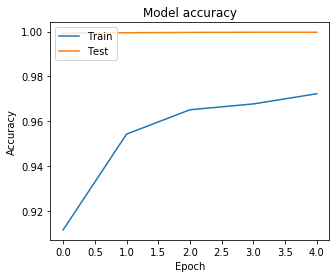

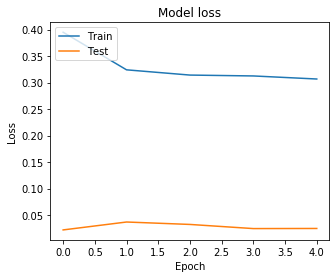

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = res_model.fit_generator(generator=res_train_generator,
                    steps_per_epoch=res_train_x.shape[0] // batch_size,
                    validation_data=(res_test_x, cat_test_y),
                    epochs=5, verbose=1, callbacks=[es])

plot_model_history(history)

In [0]:
_, train_acc = res_model.evaluate(res_train_x, cat_train_y, verbose=0)
_, test_acc = res_model.evaluate(res_test_x, cat_test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


## Try your photos

0.0463 0.9537


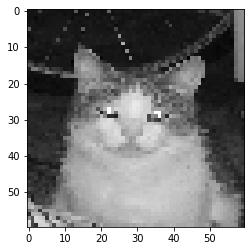

In [0]:
photo = load_img(root_path + 'bender.jpg', target_size=(60, 60))

photo = img_to_array(photo)
photo = rgb2gray(photo)
plt.imshow(photo)

photo = photo.reshape(1, 60, 60, 1)
photo = gray_to_rgb(photo)
photo /= 255.

pred = res_model.predict(photo)
print(round(pred[0][0], 4), round(pred[0][1], 4))

In [0]:
model.save('drive/My Drive/Colab Notebooks/cat_resnet.h5')

# Visualization experiments

In [0]:
model = load_model('drive/My Drive/Colab Notebooks/cat_model.h5')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
!pip install -U git+git://github.com/raghakot/keras-vis.git

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-d4b32oap
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-d4b32oap
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38887 sha256=b3c90c680188f44db19085794630a98f570877a521b30261846b4e00c5abb9f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-hwve2kou/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [0]:
from vis.utils import utils
from keras import activations

import warnings
warnings.filterwarnings('ignore')

# Swap softmax with linear
model.layers[-1].activation = activations.linear
model = utils.apply_modifications(model)

In [0]:
# Load noisy "cat" pict
pics = np.load(root_path + 'top.npy')
pics.shape

(10, 60, 60)

Example of how it should be:


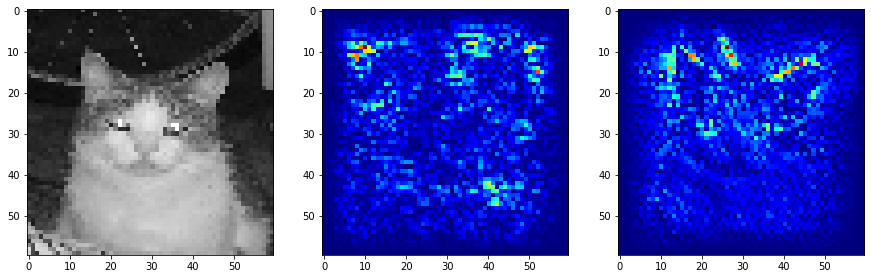

In [0]:
from vis.visualization import visualize_saliency, overlay

plt.rcParams['figure.figsize'] = (15, 5)
f, ax = plt.subplots(1, 3)

print('Example of how it should be:')

cat_img = load_img(root_path + 'bender.jpg', target_size=(60, 60))
cat_img = img_to_array(cat_img)
cat_img = rgb2gray(cat_img)

ax[0].imshow(cat_img.reshape(60, 60))

cat_img = cat_img.reshape(1, 60, 60, 1)
cat_img /= 255.

grads_slc = visualize_saliency(model, -1, filter_indices=1, seed_input=cat_img)
ax[1].imshow(grads_slc, cmap='jet')

grads = visualize_saliency(model, -1, filter_indices=1, seed_input=cat_img, backprop_modifier='guided')
ax[2].imshow(grads, cmap='jet')
